# Importing Libraries

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss

In [54]:
import sys
import os


module_path =os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"\\scripts")

if module_path not in sys.path:
    sys.path.append(module_path+"\\models")

In [55]:
from edaScript import EDA
from loadData import READ
from sequentailAB import SequentialTest
from classicalAB import classicalAB
from classic import classicalABTesting
from ABtesting import ABTesting

# Loading Data

In [56]:
ldInstance=READ('../data/AdSmartABdata.csv')
data=ldInstance.readData()

Reading csv file..

File read successfully



In [57]:
data

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
...,...,...,...,...,...,...,...,...,...
8072,ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,2020-07-05,7,Generic Smartphone,6,Chrome Mobile,0,0
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,9,Generic Smartphone,6,Chrome Mobile,0,0
8075,ffeeed62-3f7c-4a6e-8ba7-95d303d40969,exposed,2020-07-05,15,Samsung SM-A515F,6,Samsung Internet,0,0


In [58]:
data.shape

(8077, 9)

# EDA 

In [59]:
edaInstance=EDA(data)


In [60]:
edaInstance.calculateMissing()

The report of missing values is as follows


,Total Missing,Percentage Missing
auction_id,0.0,0.0
experiment,0.0,0.0
date,0.0,0.0
hour,0.0,0.0
device_make,0.0,0.0
platform_os,0.0,0.0
browser,0.0,0.0
yes,0.0,0.0
no,0.0,0.0


The dataset doesn't have any missing values in any of its column

In [61]:
edaInstance.dropDuplicates()

Droppping duplicates

There are 0 duplicates in the dataset

Done dropping duplicates! 



,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
...,...,...,...,...,...,...,...,...,...
8072,ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,2020-07-05,7,Generic Smartphone,6,Chrome Mobile,0,0
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,9,Generic Smartphone,6,Chrome Mobile,0,0
8075,ffeeed62-3f7c-4a6e-8ba7-95d303d40969,exposed,2020-07-05,15,Samsung SM-A515F,6,Samsung Internet,0,0


Our search for duplicated rows didn't find any

## Visualization

We try to understand our categorical columns present by doing value counts, histograms and countplots amongst other visualization methods

### Experiments

In [62]:
edaInstance.valueCounts('experiment')

control    4071
exposed    4006
Name: experiment, dtype: int64

The number of users who interacted with the dummy ad 4071 which was higher than the number of users who interacted with the exposed /curated ad 

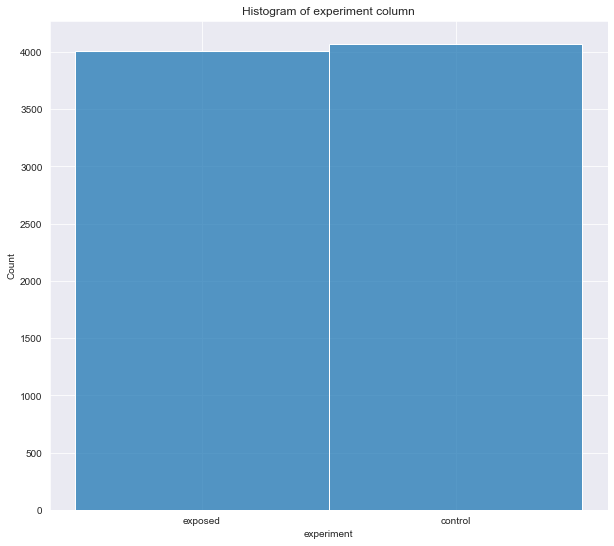

In [63]:
edaInstance.histVizualisation('experiment')

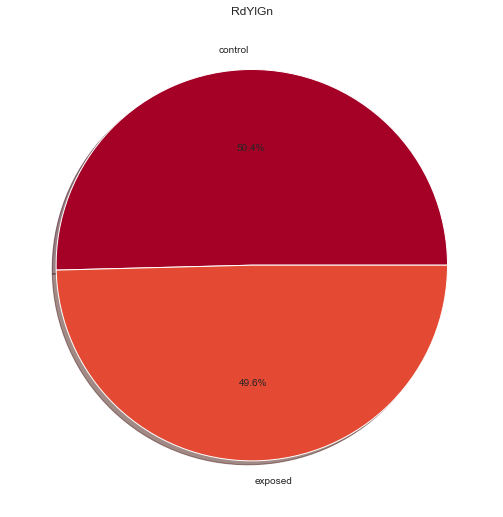

In [64]:
edaInstance.pieChart('experiment','RdYlGn')

### Device Make

In [65]:
edaInstance.valueCounts('device_make')

Generic Smartphone    4743
iPhone                 433
Samsung SM-G960F       203
Samsung SM-G973F       154
Samsung SM-G950F       148
                      ... 
K7                       1
Samsung SM-N910F         1
Samsung SM-A605F         1
S8                       1
MHA-L09                  1
Name: device_make, Length: 270, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


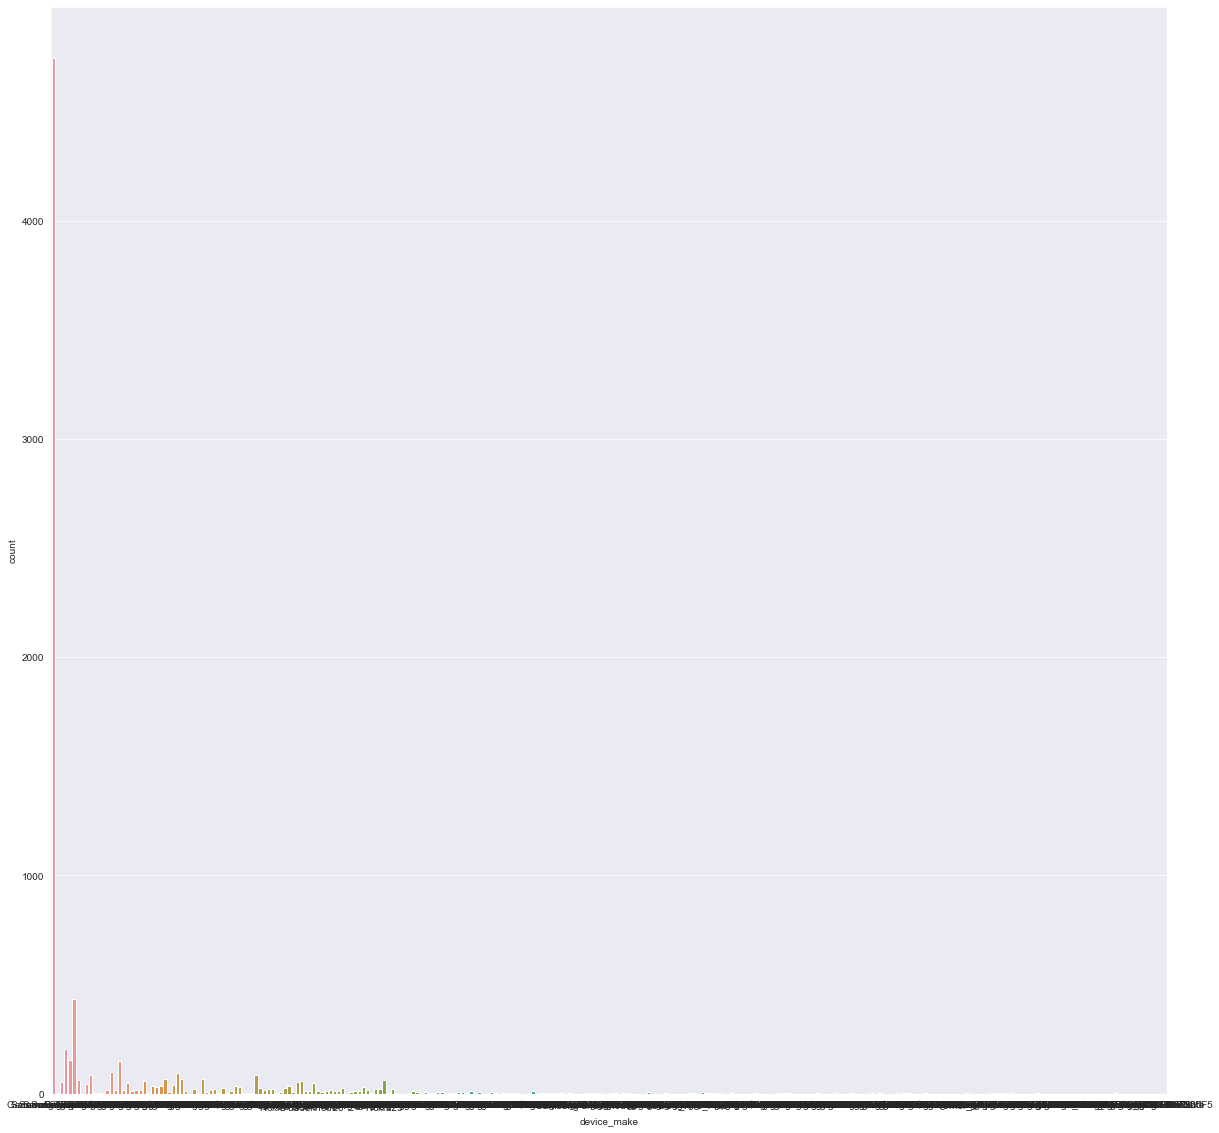

In [66]:

plt.figure(figsize=(20,20))
sns.countplot(data['device_make'])

## Hour

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distribution of interactions during the day')

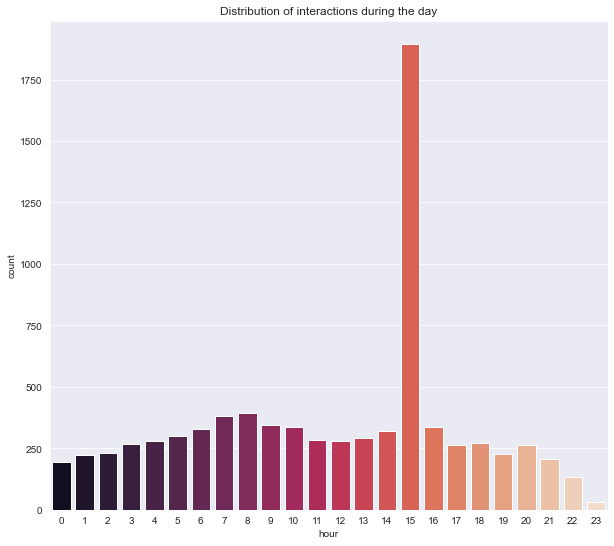

In [67]:
plt.figure(figsize=(10,9))
sns.countplot(data['hour'],palette='rocket')
plt.title("Distribution of interactions during the day")

Seems like most interatcions with the ad was experienced at 3pm. This also translates to the highest traffic 

## Platform

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distribution of OS on users')

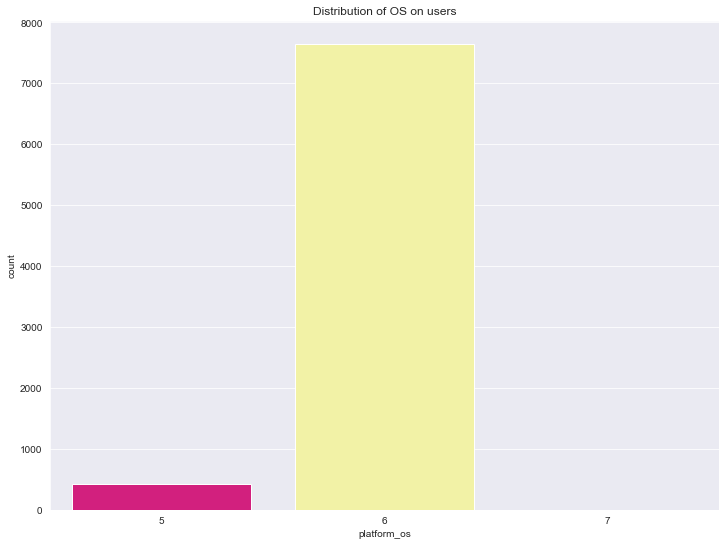

In [68]:
plt.figure(figsize=(12,9))
sns.countplot(data['platform_os'],palette='Accent_r')
plt.title("Distribution of OS on users")

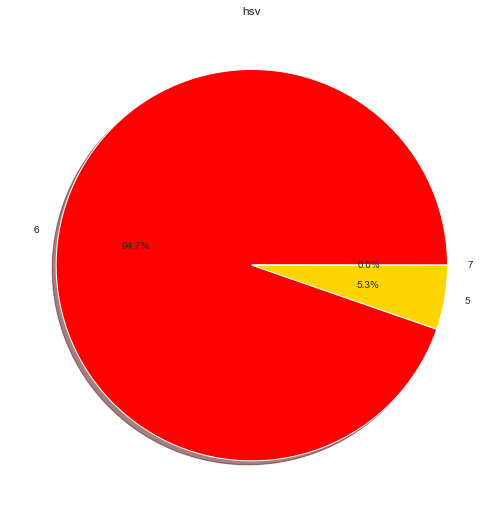

In [69]:
edaInstance.pieChart('platform_os','hsv')

94% of customers used os 6 on their mobile deivces as compared to 5.3 % who used 5

## Browser

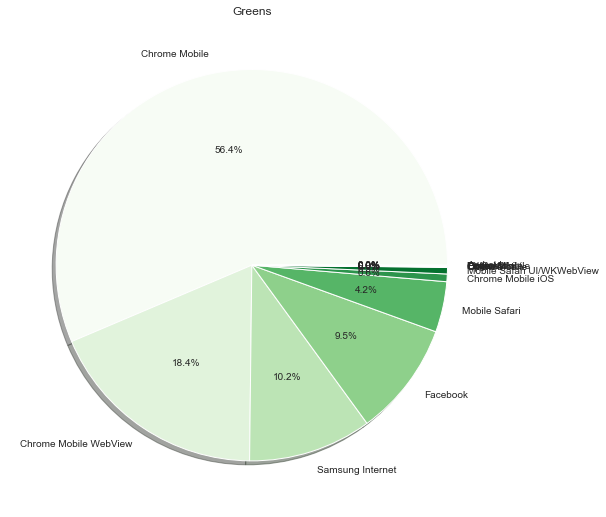

In [70]:
edaInstance.pieChart('browser','Greens')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

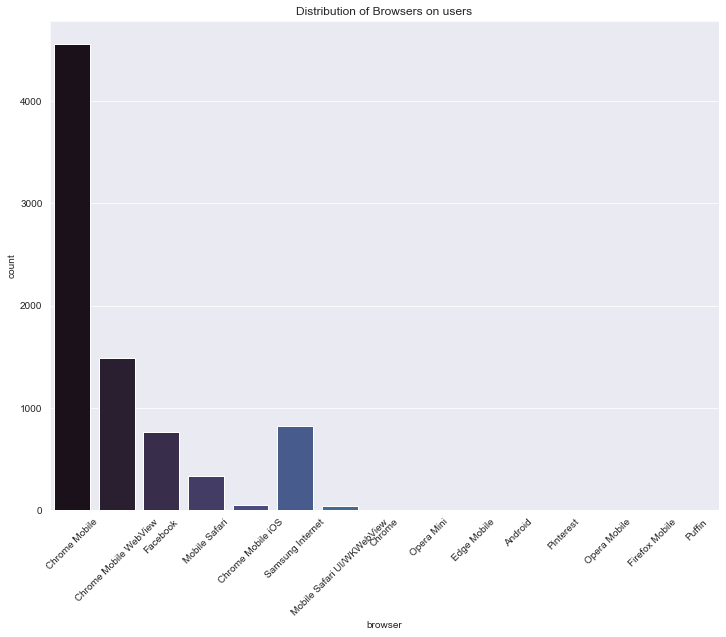

In [71]:
plt.figure(figsize=(12,9))
sns.countplot(data['browser'],palette='mako')
plt.title("Distribution of Browsers on users")
plt.xticks(rotation=45)

Chrome mobile is favored most among users with a 56.4% share followed by chrome mobile webview and facebook 

## Days

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

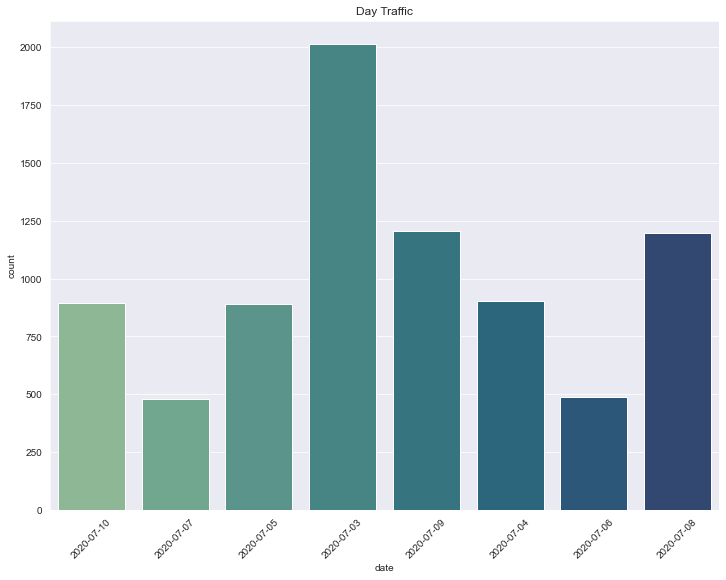

In [72]:
plt.figure(figsize=(12,9))
sns.countplot(data['date'],palette='crest')
plt.title("Day Traffic")
plt.xticks(rotation=45)

The third of July seemed to be responsible for most of the ad traffic with the 6th of July having the least followed by the 7th. It is safe to say that as the days went by traffic reduced

# Feature Engineering

## Answered

We create a new column according to the data if the yes and no columns are both 0 and hence the user saw the ad but didn't interact with it 

In [73]:
data['interacted']=np.where((data['yes']==0) & (data['no']==0),0,1)

In [22]:
data

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no,interacted
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0,0
...,...,...,...,...,...,...,...,...,...,...
8072,ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,2020-07-05,7,Generic Smartphone,6,Chrome Mobile,0,0,0
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0,0
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,9,Generic Smartphone,6,Chrome Mobile,0,0,0
8075,ffeeed62-3f7c-4a6e-8ba7-95d303d40969,exposed,2020-07-05,15,Samsung SM-A515F,6,Samsung Internet,0,0,0


We drop people who didn't interact with the site whatsoever

In [23]:
data=data[data['interacted']==1]

In [24]:
data

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no,interacted
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1,1
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0,1
20,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0,1,1
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,0,1
27,00ebf4a8-060f-4b99-93ac-c62724399483,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,1,1
...,...,...,...,...,...,...,...,...,...,...
8059,ffa08ff9-a132-4051-aef5-01a9c79367bc,exposed,2020-07-05,21,Generic Smartphone,6,Chrome Mobile,1,0,1
8063,ffb176df-ecd2-45d3-b05f-05b173a093a7,exposed,2020-07-04,1,Generic Smartphone,6,Chrome Mobile,1,0,1
8064,ffb79718-6f25-4896-b6b3-e58b80a6e147,control,2020-07-09,7,Generic Smartphone,6,Chrome Mobile,0,1,1
8069,ffca1153-c182-4f32-9e90-2a6008417497,control,2020-07-10,16,Generic Smartphone,6,Chrome Mobile,0,1,1


# Classical A/B Testing

In [25]:
classicalInstance=classicalAB(data)

In [26]:
exposed,control,positiveExposed,positiveControl,probExposed,probPosControl,summary=classicalInstance.convertData()

The number of users in each experiment is as follows 

The number of exposed users 657 

The number of control users 586 

Those with a positive interaction with the ad 
 
From the exposed group 308 

From the control group 264 

The conversion rate is 

Exposed 0.4687975646879756 

Control 0.45051194539249145 
 
The lift from the experiment is 0.018285619295484168 


Lets plot this data in a binomial chart

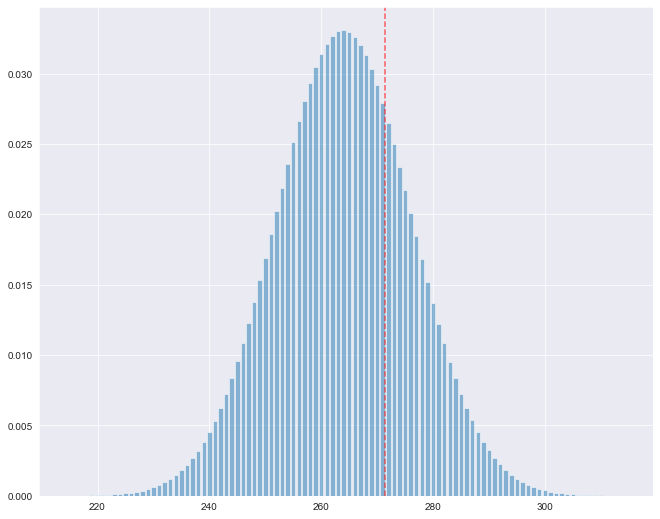

In [27]:
#using the values above

fig,ax=plt.subplots(figsize=(11,9))
x=np.linspace(264-49,264+50,100)
y=ss.binom(586,.4505).pmf(x)
ax.bar(x,y,alpha=0.5)
#we viz a line that shows upto the 3rd quartile

ax.axvline(x=.468*580,c='red',alpha=.60,linestyle='--')


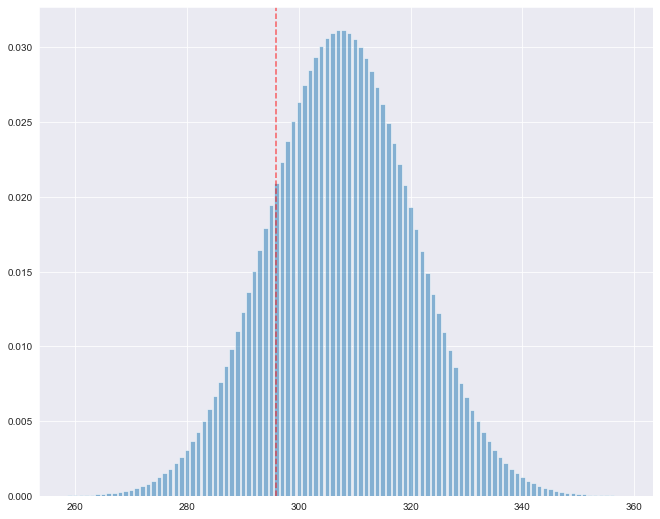

In [28]:

fig,ax=plt.subplots(figsize=(11,9))
x=np.linspace(308-49,308+50,100)
y=ss.binom(657,.468).pmf(x)
ax.bar(x,y,alpha=0.5)
#we viz a line that shows upto the 3rd quartile

ax.axvline(x=.4505*657,c='red',alpha=.60,linestyle='--')

In [29]:
ss.binom(len(exposed),probExposed).pmf(300)

0.02567993346238

In [30]:
StandardizeA=np.sqrt(probExposed*(1-probExposed))/np.sqrt(len(exposed))
StandardizeA

0.019468837373132736

In [31]:
StandardizeB=np.sqrt(probPosControl*(1-probPosControl))/np.sqrt(len(control))
StandardizeB

0.02055339057798332

In [32]:
def pvalue(probExposed,probPosControl):
    StandardizeA=np.sqrt(probExposed*(1-probExposed))/np.sqrt(len(exposed))
    StandardizeB=np.sqrt(probPosControl*(1-probPosControl))/np.sqrt(len(control))
    Zscore=(probPosControl-probExposed)/np.sqrt(StandardizeA**2 + StandardizeB**2)
    
    return ss.norm.cdf(Zscore)

In [33]:
pvalue(probExposed,probPosControl)

0.2591726745827285

In [34]:
def getConfidence(probExposed,probPosControl):
    StandardizeA=np.sqrt(probExposed*(1-probExposed))/np.sqrt(len(exposed))
    StandardizeB=np.sqrt(probPosControl*(1-probPosControl))/np.sqrt(len(control))
    Zscore=(probPosControl-probExposed)/np.sqrt(StandardizeA**2 + StandardizeB**2)
    
    return ss.norm.sf(Zscore)
    


In [35]:
getConfidence(probExposed,probPosControl)

0.7408273254172715

In [74]:
testInstance=ABTesting(data)
exposed,control=testInstance.splitExperiments()

In [37]:
probExposed,probControl,lift,n1,n2=testInstance.ctrCampaign(exposed,control)

In [38]:
standaradError1,standaradError2,standardError,tStatistic,criticalValue,confInt,p_value=testInstance.tTest(exposed,control,n1,n2,lift,.05)

In [39]:
p_value

0.5186058623605803

In [40]:
tStatistic

0.645680181221037

In [41]:
confInt

[-0.028331323691964887, 0.06490256228293323]

In [42]:
standaradError1

0.00037810369553450236

In [43]:
standaradError2

0.0004239148941402185

In [44]:
criticalValue

1.646082405507605

In [45]:
from statsmodels.stats.proportion import proportions_ztest

In [46]:
trialSuccess=np.array([exposed['yes'].sum(),control['yes'].sum()])
total=np.array(exposed['yes'].sum()+exposed['no'].sum()+control['yes'].sum()+control['no'].sum())

In [47]:
Z_testStat,p_value=proportions_ztest(trialSuccess,total,value=0,alternative='two-sided')

In [48]:
p_value

0.03602101191803692

In [49]:
Z_testStat

2.0966901624915755

In [75]:
x=exposed['yes']
y=control['yes']

In [79]:
x=data[data['experiment']=='exposed']
y=data[data['experiment']=='control']


x=x['yes']
y=y['yes']

In [80]:
classicalABInstance=classicalABTesting(data)
classicalABInstance.ConditionalSPRT(x,y,80)

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Int64Index([   3,    4,    5,    6,    7,\n            ...\n            3990, 3993, 3995, 4004, 4005],\n           dtype='int64', length=2033). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"